<a href="https://www.kaggle.com/code/ahmethasanolu/mldfa?scriptVersionId=240420267" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/newsdataset/bbc-text.csv


In [2]:
# Veri seti: BBC News Classification Dataset
# Kaynak: https://www.kaggle.com/code/yufengdev/bbc-text-categorization
df = pd.read_csv("/kaggle/input/newsdataset/bbc-text.csv")
df.head(5)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
df["category"].value_counts()

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

In [4]:
import re
def preprocess(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['clean_text'] = df['text'].apply(preprocess)
#Ön işlemleri yapıyoruz burada bir temizleme işlemi yaptım

In [5]:
df

,category,text,clean_text
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say th...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...
...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...,kilroy unveils immigration policy ex chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...,how political squabbles snowball it s become c...


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['clean_text'])
y = df['category']
#tokenizasyon yaptım

In [7]:
df

,category,text,clean_text
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say th...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...
...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...,kilroy unveils immigration policy ex chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...,how political squabbles snowball it s become c...


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Eğitim/test baslangic

In [9]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
#Naive bayes modelinde eğitim

In [10]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
#Logistic regression modelinde eğitim

In [11]:
print("Naive bayes performansı:", accuracy_score(y_test, y_pred_nb))
print("Logistic regression performansı:", accuracy_score(y_test, y_pred_lr))
#accuracy_score ne kadar doğru tahmin yaptığını gösteriyo(Doğruluk raporu)

Naive bayes performansı: 0.9595505617977528
Logistic regression performansı: 0.9640449438202248


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)#karmasıklık matrixi, hangi sınıflar daha karmasıkmıs onu gosteriyor
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=set(y), yticklabels=set(y), cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

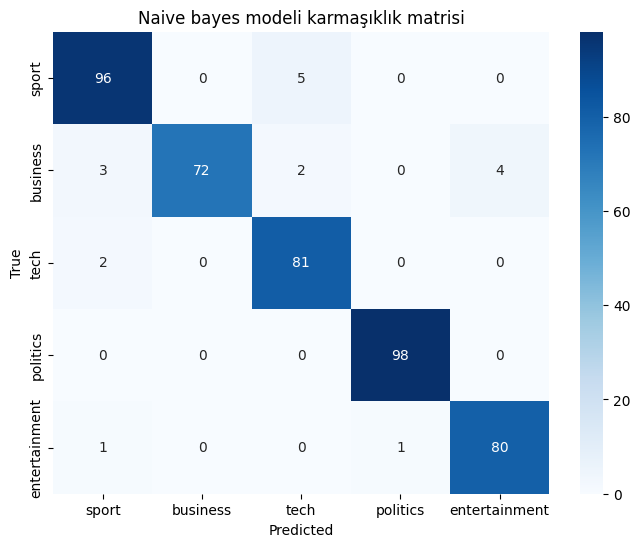

In [13]:
plot_conf_matrix(y_test, y_pred_nb, "Naive bayes modeli karmaşıklık matrisi")
#örneğin business alanında 101 tane veri varken 96 tanesi doğru 5 tanesi sport olarak tahmin edilimis vs.


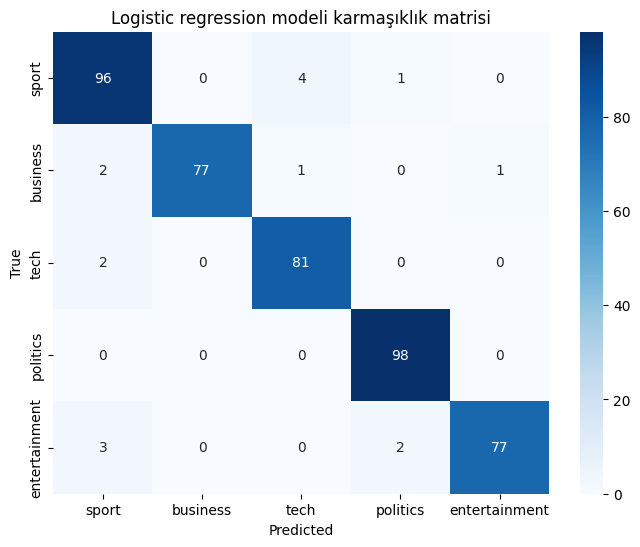

In [14]:
plot_conf_matrix(y_test, y_pred_lr, "Logistic regression modeli karmaşıklık matrisi")
#Logistic regression modelinde business alanında 101 tane veri varken 96 tanesi doğru 4 tanesi sport 1 tanesi entertainment olarak tahmin edilimis vs.


In [15]:
print("\nNaive bayes karşılaştırma raporu:\n", classification_report(y_test, y_pred_nb))
print("\nLogistic regression karşılaştırma raporu:\n", classification_report(y_test, y_pred_lr))
#Bu rapor precision(kesinlik), recall(duyarlılık) ve F1-score değerleriyle detay verir.


Naive bayes karşılaştırma raporu:
                precision    recall  f1-score   support

     business       0.94      0.95      0.95       101
entertainment       1.00      0.89      0.94        81
     politics       0.92      0.98      0.95        83
        sport       0.99      1.00      0.99        98
         tech       0.95      0.98      0.96        82

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445


Logistic regression karşılaştırma raporu:
                precision    recall  f1-score   support

     business       0.93      0.95      0.94       101
entertainment       1.00      0.95      0.97        81
     politics       0.94      0.98      0.96        83
        sport       0.97      1.00      0.98        98
         tech       0.99      0.94      0.96        82

     accuracy                           0.96       445
    macro avg       0.97      0.96 

In [16]:
def predict_category(text):
    clean = preprocess(text)
    vec = vectorizer.transform([clean])
    
    pred_nb = nb.predict(vec)[0]
    pred_lr = lr.predict(vec)[0]
    
    print(f"Naive Bayes Tahmini: {pred_nb}")
    print(f"Logistic Regression Tahmini: {pred_lr}")

sample_text = "The economy is growing rapidly due to new policies and trade deals."
predict_category(sample_text)
sample_text2 = "The politics in this country is really confusing."
predict_category(sample_text2)
sample_text3 = "Fenerbahçe will win another(?) league trophy."
predict_category(sample_text3)


Naive Bayes Tahmini: business
Logistic Regression Tahmini: business
Naive Bayes Tahmini: politics
Logistic Regression Tahmini: sport
Naive Bayes Tahmini: sport
Logistic Regression Tahmini: sport
